# 2.1 Keras 학습과정 확인
이번 실습에서는 모델이 학습하는 동안 변화하는 학습양상을 확인하는 방법을 알아본다  

In [ ]:
from keras.utils import np_utils
from keras import datasets
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)

n_in = 28*28
n_out = np.shape(Y_test_onehot)[1]

In [ ]:
def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =128, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units =32, activation='relu'))
    model.add(Dense(units =n_out, activation='softmax'))
    return model

In [ ]:
model = DNN_seq(n_in, n_out)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## (1) Keras Callback
model의 fit() 함수로 학습을 진행하는 동안, 매 epoch마다 지정한 함수를 호출할 수 있음

ModelCheckpoint : 학습 중 모델 저장

EarlyStopping : 학습양상을 보고 학습을 조기에 종료

TensorBoard : tensorboard로 확인할 수 있도록 학습양상을 기록

외에 kereas.callbacks.Callback을 상속받아 원하는 callback 함수를 만들 수 있음
    
https://keras.io/callbacks/

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
import os
import datetime

학습과정을 저장할 directory 생성

In [6]:
def make_dir(path):
    today = str(datetime.date.today())
    path_date = path+'/'+today
    
    if not os.path.exists(path_date):
        os.makedirs(path_date)
    return path_date

In [7]:
model_path=make_dir('./model')
tensorboard_path=make_dir('./tensorboard')

modelconfig = str(n_in)+'_'+str(n_out)
model_name_path = model_path+'/'+modelconfig+"_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5"

print(model_name_path)
print(tensorboard_path)

./model/2020-12-17/784_10_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5
./tensorboard/2020-12-17


필요한 callback 함수들을 정의하고 list로 fit() 함수에 전달

In [8]:
checkpointer=ModelCheckpoint(filepath=model_name_path, monitor='val_accuracy', verbose=0, save_best_only=True)
tb_saver = TensorBoard(log_dir=tensorboard_path, write_graph=True)
earlystopper = EarlyStopping(monitor='val_accuracy', patience=40, verbose=0, mode='auto')

callback_list=[checkpointer, tb_saver, earlystopper]

In [9]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=50, validation_split=0.3, verbose=2, callbacks = callback_list)

Epoch 1/100
165/165 - 2s - loss: 0.5455 - accuracy: 0.8491 - val_loss: 0.2536 - val_accuracy: 0.9284
Epoch 2/100
165/165 - 2s - loss: 0.2134 - accuracy: 0.9394 - val_loss: 0.1877 - val_accuracy: 0.9451
Epoch 3/100
165/165 - 2s - loss: 0.1569 - accuracy: 0.9552 - val_loss: 0.1538 - val_accuracy: 0.9556
Epoch 4/100
165/165 - 2s - loss: 0.1244 - accuracy: 0.9645 - val_loss: 0.1379 - val_accuracy: 0.9594
Epoch 5/100
165/165 - 2s - loss: 0.1024 - accuracy: 0.9704 - val_loss: 0.1306 - val_accuracy: 0.9610
Epoch 6/100
165/165 - 2s - loss: 0.0873 - accuracy: 0.9752 - val_loss: 0.1169 - val_accuracy: 0.9657
Epoch 7/100
165/165 - 2s - loss: 0.0738 - accuracy: 0.9790 - val_loss: 0.1145 - val_accuracy: 0.9658
Epoch 8/100
165/165 - 2s - loss: 0.0642 - accuracy: 0.9819 - val_loss: 0.1201 - val_accuracy: 0.9648
Epoch 9/100
165/165 - 2s - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.1068 - val_accuracy: 0.9695
Epoch 10/100
165/165 - 2s - loss: 0.0462 - accuracy: 0.9870 - val_loss: 0.1039 - val_accura

In [10]:
os.listdir(model_path)

['784_10_05-0.1024_0.1306_0.9610.h5',
 '784_10_50-0.0005_0.1435_0.9742.h5',
 '784_10_16-0.0198_0.1010_0.9715.h5',
 '784_10_04-0.1244_0.1379_0.9594.h5',
 '784_10_03-0.1569_0.1538_0.9556.h5',
 '784_10_19-0.0122_0.1049_0.9731.h5',
 '784_10_33-0.0010_0.1279_0.9734.h5',
 '784_10_18-0.0152_0.1054_0.9721.h5',
 '784_10_06-0.0873_0.1169_0.9657.h5',
 '784_10_02-0.2134_0.1877_0.9451.h5',
 '784_10_49-0.0010_0.1440_0.9738.h5',
 '784_10_52-0.0003_0.1465_0.9744.h5',
 '784_10_01-0.5455_0.2536_0.9284.h5',
 '784_10_07-0.0738_0.1145_0.9658.h5',
 '784_10_81-0.0000_0.1727_0.9747.h5',
 '784_10_29-0.0020_0.1229_0.9733.h5',
 '784_10_14-0.0274_0.1037_0.9707.h5',
 '784_10_41-0.0006_0.1387_0.9734.h5',
 '784_10_54-0.0002_0.1489_0.9744.h5',
 '784_10_09-0.0633_0.1068_0.9695.h5']

In [11]:
os.listdir(tensorboard_path)

['validation', 'train']

## (2) history 확인
fit() 함수는 history 객체를 반환함

history['loss']: epoch 마다 기록되는 train loss

history['accuracy'] : accuracy를 측정할 수 있는 문제이며 compile() 때 metric으로 accuracy를 지정하였다면 기록됨
    
history['val_loss'] : 검증 데이터가 있다면 기록되는 validation loss

history['val_accuracy'] : 검증 데이터가 있고 accuracy를 측정할 수 있다면 기록되는 validation accuracy 

In [12]:
print(history.history['loss'])

[0.5455436706542969, 0.21341177821159363, 0.1568726748228073, 0.12437912821769714, 0.10240571200847626, 0.08725466579198837, 0.07375040650367737, 0.06417295336723328, 0.06330513209104538, 0.046162549406290054, 0.04028977081179619, 0.03651929274201393, 0.030738623812794685, 0.02742214873433113, 0.02305685728788376, 0.019812433049082756, 0.016758371144533157, 0.015215061604976654, 0.012225783430039883, 0.010141506791114807, 0.009107611142098904, 0.008077086880803108, 0.00641093822196126, 0.007267385721206665, 0.004641893785446882, 0.0036542038433253765, 0.003086258191615343, 0.0027180342003703117, 0.0019643702544271946, 0.001600834308192134, 0.001493263291195035, 0.001243557664565742, 0.0010444583604112267, 0.015866903588175774, 0.03117408975958824, 0.005451848730444908, 0.002188083715736866, 0.0011660965392366052, 0.0007904316298663616, 0.0006656326004303992, 0.0005839336663484573, 0.0005205650231800973, 0.0004726294137071818, 0.000508704746607691, 0.006887027528136969, 0.01282056421041

matplotlib를 이용하여 history 객체 내부에 저장된 값들을 graph로 표현

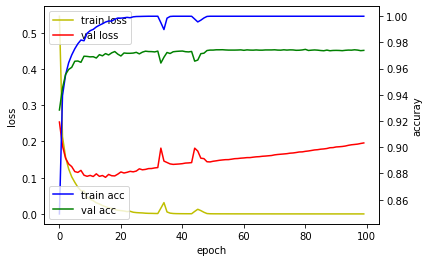

In [13]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
fig_path=make_dir('./figure')
fig.savefig(fig_path+'/'+str(datetime.datetime.now().time())+'.png')

## (3) 모델 저장하기, 불러오기
저장하기 : model 객체의 내부 함수인 save() .h5 형식으로 저장할 수 있음 [1.모델의 구조, 2.학습된 파라미터, 3.complie() 설정]

불러오기 : load_model 함수로 .h5 파일에서 모델을 불러올 수 있음

In [16]:
from keras.models import load_model

In [17]:
model = 1
model = load_model(model_path+'/'+'784_10_54-0.0002_0.1489_0.9744.h5')

In [18]:
model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=3, validation_split=0.3, verbose=2)

Epoch 1/3
165/165 - 2s - loss: 2.1427e-04 - accuracy: 1.0000 - val_loss: 0.1495 - val_accuracy: 0.9743
Epoch 2/3
165/165 - 2s - loss: 1.9164e-04 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9745
Epoch 3/3
165/165 - 2s - loss: 1.7771e-04 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.9744


In [19]:
model.save(model_path+'/'+'latest_model.h5')

## (4) tensorboard로 학습과정 확인하기
tensorflow의 가시화 툴인 tensorboard로 학습과정을 확인

[터미널] tensorboard --logdir=./tensorboard/날짜

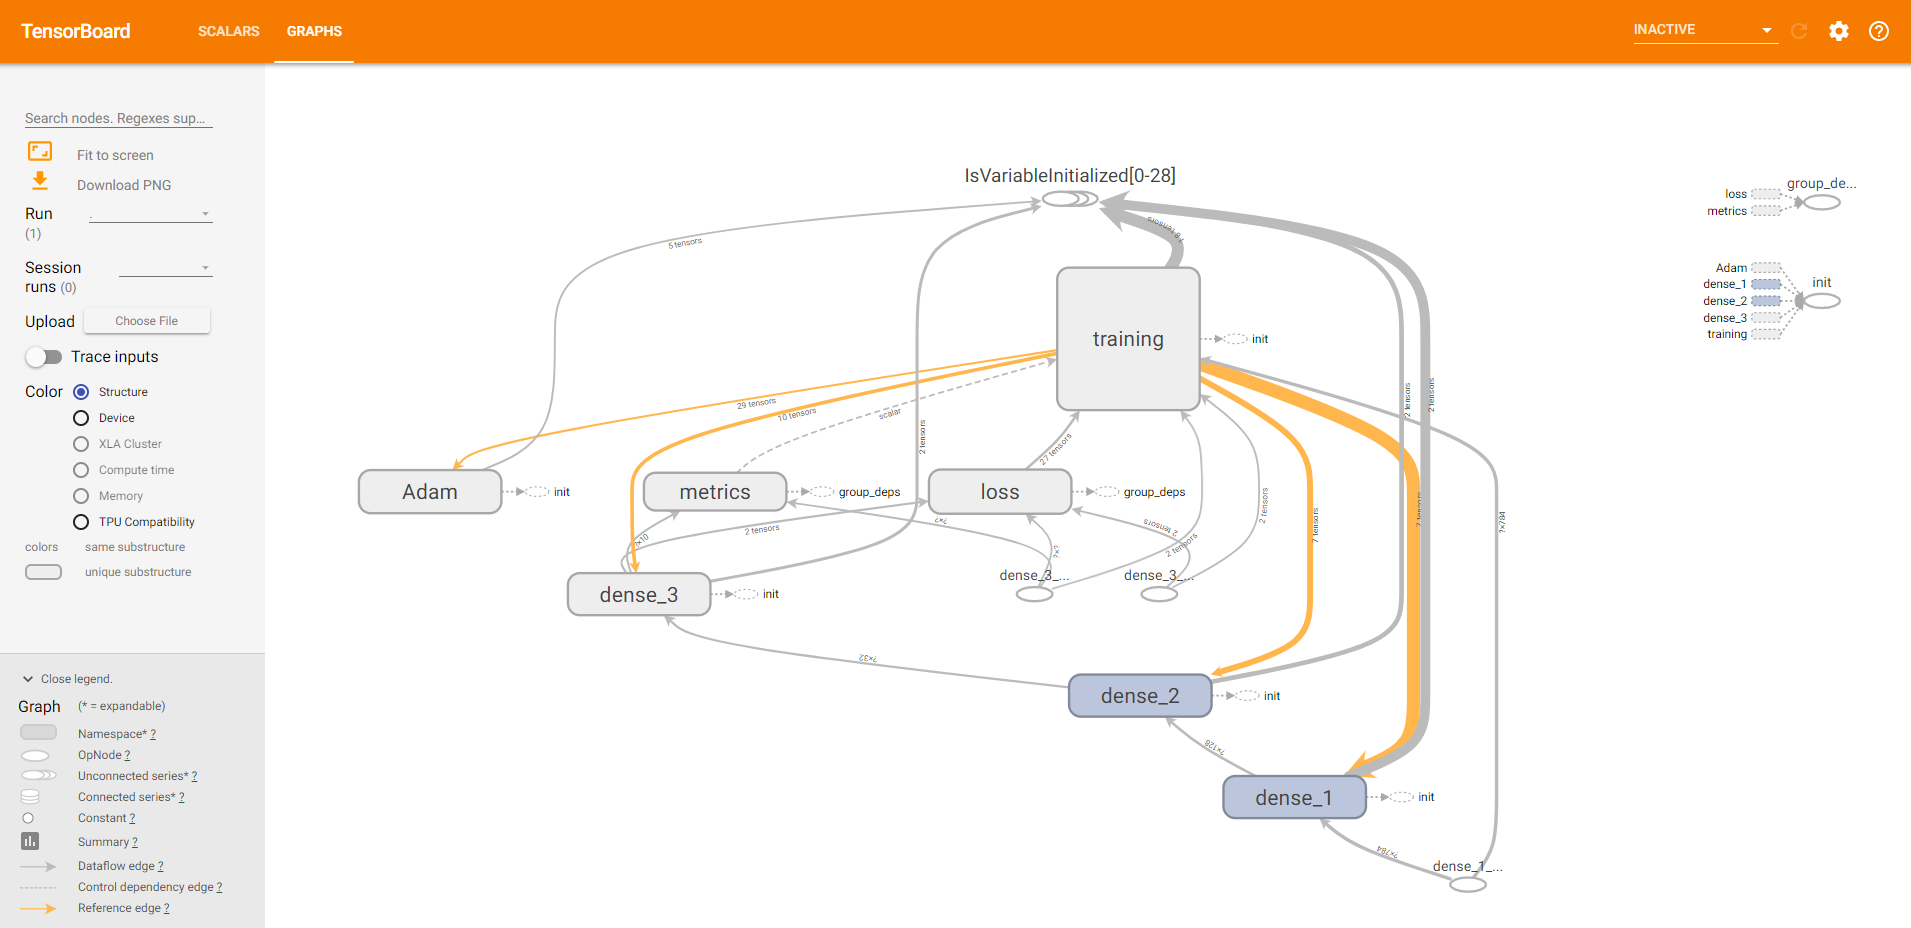

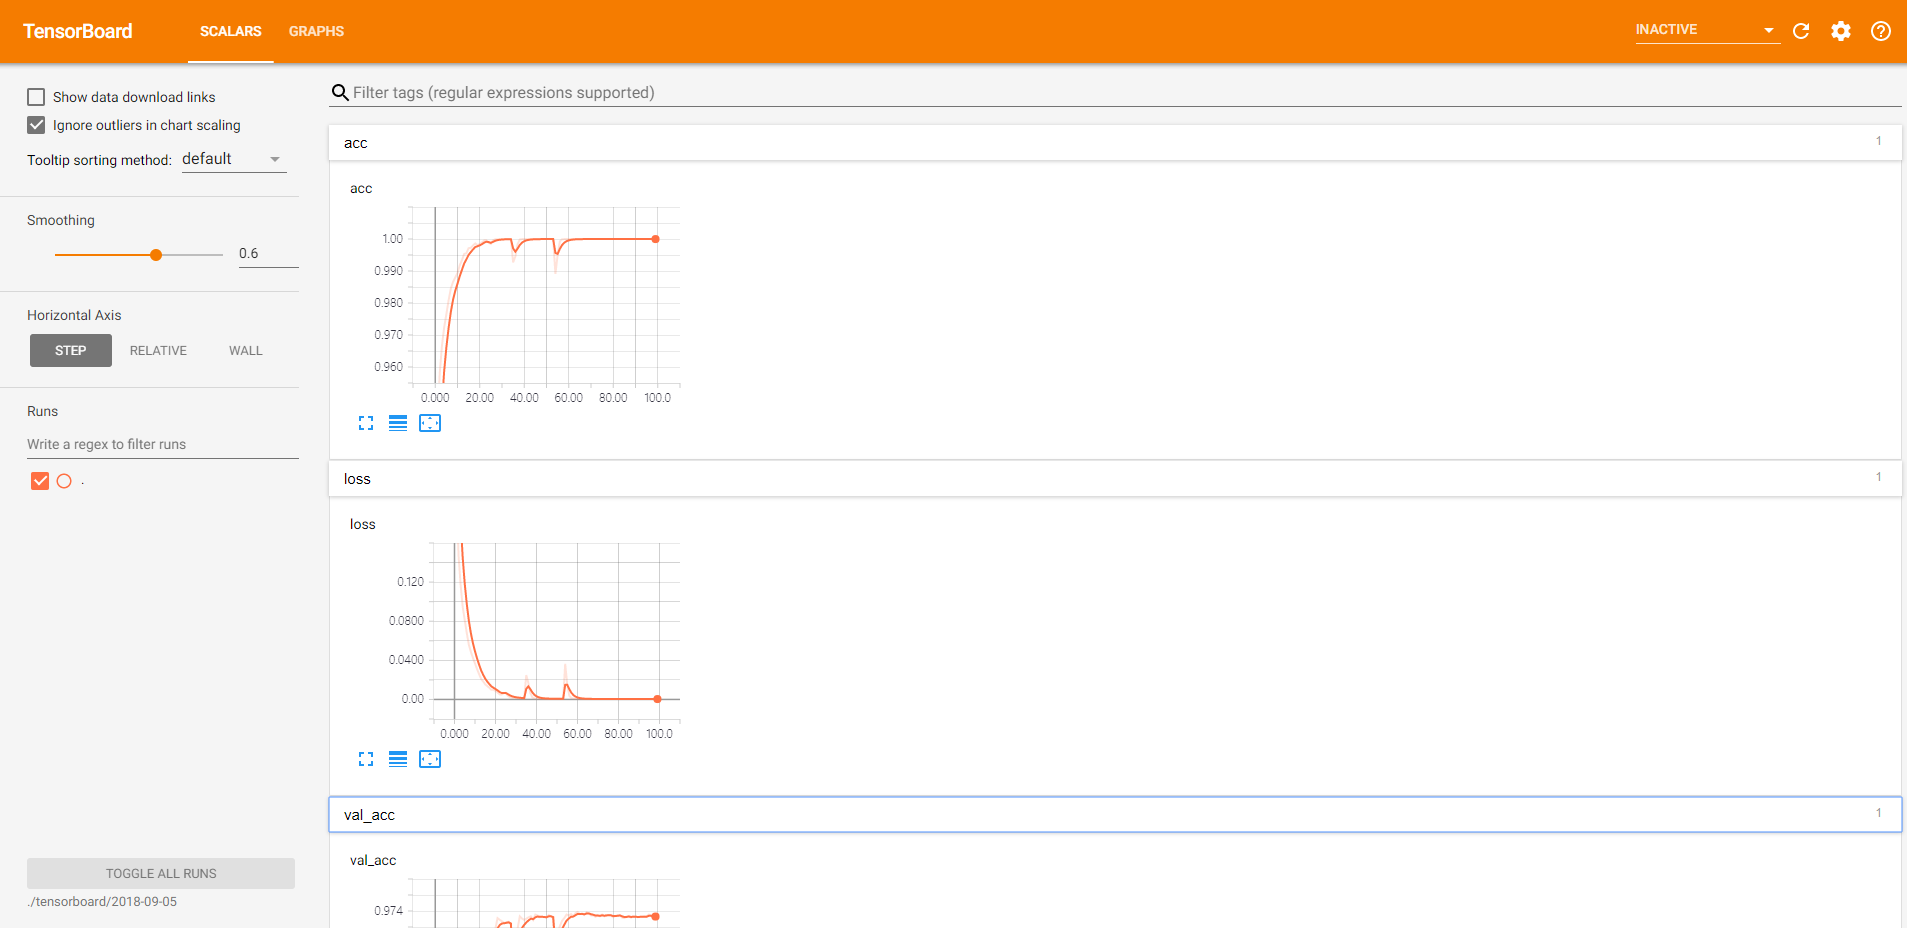